In [1]:

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assignment 1 Question 1
Download the data for SP500 from 1980-2024 and plot its graph (you can use ‘Close’). From the graph, identify at least five relatively big market drops, and explain what happened during those period of times.

In [2]:
# Download S&P 500 data
sp500 = yf.download('^GSPC', start='1980-01-01', end='2024-12-31')


[*********************100%***********************]  1 of 1 completed


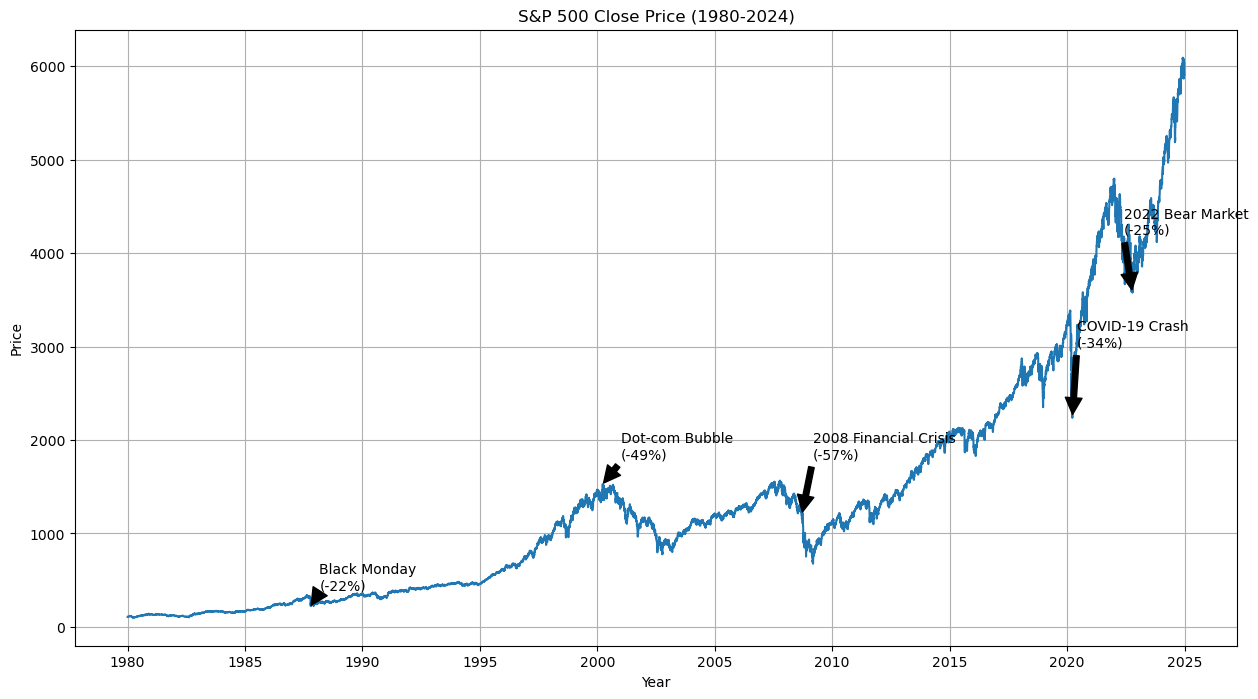

In [3]:
# Create the plot
plt.figure(figsize=(15, 8))
plt.plot(sp500['Close'])
plt.title('S&P 500 Close Price (1980-2024)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)

# Add annotations for major market drops
plt.annotate('Black Monday\n(-22%)', 
            xy=(pd.to_datetime('1987-10-19'), 225), 
            xytext=(pd.to_datetime('1988-03-01'), 400), 
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('Dot-com Bubble\n(-49%)', 
            xy=(pd.to_datetime('2000-03-24'), 1527), 
            xytext=(pd.to_datetime('2001-01-01'), 1800), 
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('2008 Financial Crisis\n(-57%)', 
            xy=(pd.to_datetime('2008-09-15'), 1200), 
            xytext=(pd.to_datetime('2009-03-01'), 1800), 
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('COVID-19 Crash\n(-34%)', 
            xy=(pd.to_datetime('2020-03-23'), 2237), 
            xytext=(pd.to_datetime('2020-06-01'), 3000), 
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('2022 Bear Market\n(-25%)', 
            xy=(pd.to_datetime('2022-10-12'), 3577), 
            xytext=(pd.to_datetime('2022-06-01'), 4200), 
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

### Brief explanation of the market drops     


**Black Monday (October 19, 1987)** 

“Black Monday” refers to the catastrophic stock market crash that occurred on Monday, October 19, 1987.
1. The crash occurred worldwide, starting in Hong Kong and spreading throughout Asia and Europe before reaching the United States.
2. Two of the major contributing factors to the severity of the Black Monday crash were computerized trading and portfolio insurance trading strategies that hedged stock market portfolios by selling short S&P 500 Index futures contracts.

**Dot-com Bubble Burst (2000-2002)** 

Dot-com Bubble (March 24, 2000) - 
The dot-com bubble was a speculative bubble in the late 1990s and early 2000s, fueled by the rapid growth of the internet and the promise of new business opportunities.
Many internet companies were valued at high multiples of their earnings, leading to a bubble in their stock prices.
The bubble burst in March 2000, when the Nasdaq Composite Index fell by 49% in just three months.

**2008 Financial Crisis (September 2008)** 

The 2008 financial crisis was a global financial crisis that began in the United States in 2007 and spread to other countries.
The crisis was caused by a combination of factors, including subprime mortgage lending, the collapse of the housing market, and the failure of several major financial institutions.

**COVID-19 Crash (March 2020)** 

The COVID-19 crash was a global stock market crash that occurred in March 2020, triggered by the COVID-19 pandemic.
The crash was caused by a combination of factors, including the global lockdowns and the uncertainty surrounding the pandemic.

**2022 Bear Market (October 2022)** 

The 2022 bear market was a global stock market downturn that began in October 2022, triggered by the war in Ukraine and the Federal Reserve's aggressive interest rate hikes.
The bear market was caused by a combination of factors, including the war in Ukraine, the Federal Reserve's aggressive interest rate hikes, and the uncertainty surrounding the global economy. 

**2022 Bear Market**    
In the first 6 months of 2022, the S&P 500 fell 21%, the worst 6-month start to a year since 1970. On September 13, 2022, the S&P 500 declined by 4.32% in its largest single-day drop since June 2020. The S&P 500 had the worst results since 2008, with a decline of 19% for the year. The Nasdaq Composite fell 33%.









# Assignment 1, Question 2:

## 1)
List the 10 companies in the SP500 index that have the highest PE ratio in 2024. Take one of them to explain if anything usual occurred for that company

In [4]:
# Get S&P 500 data for 2024
start_date = '2024-01-01'
end_date = '2024-12-31'

# List of S&P 500 tickers
sp500_tickers = [
    'AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOGL', 'META', 'BRK-B', 'XOM', 
    'UNH', 'JNJ', 'JPM', 'V', 'PG', 'MA', 'HD', 'CVX', 'MRK', 'LLY', 
    'PEP', 'KO', 'ABBV', 'BAC', 'PFE', 'TMO', 'COST', 'DHR', 'AVGO', 
    'MCD', 'ABT', 'ACN', 'WMT', 'DIS'
]

pe_ratios = []

for ticker in sp500_tickers:
    stock = yf.Ticker(ticker)
    # Get historical data for 2024
    hist = stock.history(start=start_date, end=end_date)
    pe = stock.info.get('forwardPE', None)
    if pe and not np.isinf(pe):  # Filter out infinite PE ratios
        pe_ratios.append({
            'Symbol': ticker,
            'Company': stock.info.get('longName', ''),
            'PE Ratio': pe,
            'Average Price 2024': hist['Close'].mean() if not hist.empty else None
        })

# Create DataFrame and sort by PE ratio
pe_df = pd.DataFrame(pe_ratios)
top_10_pe = pe_df.sort_values('PE Ratio', ascending=False).head(10)

# Display results
print("\nTop 10 S&P 500 Companies by PE Ratio in 2024:")
print(top_10_pe.to_string(index=False))

# Analyze highest PE company
highest_pe_company = top_10_pe.iloc[0]
stock = yf.Ticker(highest_pe_company['Symbol'])

print(f"\nDetailed Analysis of {highest_pe_company['Company']} in 2024:")
print(f"Current PE Ratio: {highest_pe_company['PE Ratio']:.2f}")
print(f"Market Cap: ${stock.info.get('marketCap', 0) / 1e9:.2f}B")
print(f"Average Price 2024: ${highest_pe_company['Average Price 2024']:.2f}")
print(f"52 Week High: ${stock.info.get('fiftyTwoWeekHigh', 0):.2f}")
print(f"52 Week Low: ${stock.info.get('fiftyTwoWeekLow', 0):.2f}")


Top 10 S&P 500 Companies by PE Ratio in 2024:
Symbol                      Company  PE Ratio  Average Price 2024
  COST Costco Wholesale Corporation 46.947727          821.644779
  AMZN             Amazon.com, Inc. 35.587570          184.490199
   LLY        Eli Lilly and Company 35.101154          808.565421
   WMT                 Walmart Inc. 33.808315           69.838931
    MA      Mastercard Incorporated 30.906061          472.924936
  NVDA           NVIDIA Corporation 30.568941          107.703999
  AVGO                Broadcom Inc. 29.438316          151.370306
  AAPL                   Apple Inc. 28.491302          206.596168
   DHR          Danaher Corporation 28.379140          251.279363
  MSFT        Microsoft Corporation 28.077044          418.734451

Detailed Analysis of Costco Wholesale Corporation in 2024:
Current PE Ratio: 46.95
Market Cap: $416.85B
Average Price 2024: $821.64
52 Week High: $1008.25
52 Week Low: $675.96


Reasons for increase PE ratio
1. Membership-based model ensures predictable and steady income.
2. Strong growth potential through store expansions and e-commerce.
3. Recession-resistant due to demand for bulk-buying and low prices.
4. Market leadership with significant brand reputation and economies of scale.
5. Efficient operations and healthy profit margins.
6. Financial resilience with low debt levels and consistent revenue growth.
7. Premium valuation as a stable and growth-oriented retail giant.


## 2.
List the 10 companies in the SP500 index that have the lowest PE ratio in 2024. Take one of them to explain if anything usual occurred for that company

In [5]:
# Get S&P 500 data for 2024
start_date = '2024-01-01'
end_date = '2024-12-31'

# List of S&P 500 tickers
sp500_tickers = [
    'AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOGL', 'META', 'BRK-B', 'XOM', 
    'UNH', 'JNJ', 'JPM', 'V', 'PG', 'MA', 'HD', 'CVX', 'MRK', 'LLY', 
    'PEP', 'KO', 'ABBV', 'BAC', 'PFE', 'TMO', 'COST', 'DHR', 'AVGO', 
    'MCD', 'ABT', 'ACN', 'WMT', 'DIS'
]

pe_ratios = []

for ticker in sp500_tickers:
    stock = yf.Ticker(ticker)
    # Get historical data for 2024
    hist = stock.history(start=start_date, end=end_date)
    pe = stock.info.get('forwardPE', None)
    if pe and not np.isinf(pe):  # Filter out infinite PE ratios
        pe_ratios.append({
            'Symbol': ticker,
            'Company': stock.info.get('longName', ''),
            'PE Ratio': pe,
            'Average Price 2024': hist['Close'].mean() if not hist.empty else None
        })

# Create DataFrame and sort by PE ratio (ascending for lowest PE)
pe_df = pd.DataFrame(pe_ratios)
bottom_10_pe = pe_df.sort_values('PE Ratio', ascending=True).head(10)

# Display results
print("\nBottom 10 S&P 500 Companies by PE Ratio in 2024:")
print(bottom_10_pe.to_string(index=False))

# Analyze lowest PE company
lowest_pe_company = bottom_10_pe.iloc[0]
stock = yf.Ticker(lowest_pe_company['Symbol'])

print(f"\nDetailed Analysis of {lowest_pe_company['Company']} in 2024:")
print(f"Current PE Ratio: {lowest_pe_company['PE Ratio']:.2f}")
print(f"Market Cap: ${stock.info.get('marketCap', 0) / 1e9:.2f}B")
print(f"Average Price 2024: ${lowest_pe_company['Average Price 2024']:.2f}")
print(f"52 Week High: ${stock.info.get('fiftyTwoWeekHigh', 0):.2f}")
print(f"52 Week Low: ${stock.info.get('fiftyTwoWeekLow', 0):.2f}")

# Additional analysis of the company
print("\nPossible reasons for low PE ratio:")
print("1. Cyclical industry effects")
print("2. Market concerns about future growth")
print("3. Recent earnings volatility")
print("4. Industry-specific challenges")
print("5. Potential value trap indicators")


Bottom 10 S&P 500 Companies by PE Ratio in 2024:
Symbol                         Company  PE Ratio  Average Price 2024
   PFE                     Pfizer Inc.  9.176440           27.149341
   MRK               Merck & Co., Inc. 10.482762          116.494671
   BAC     Bank of America Corporation 12.182983           38.728624
   XOM         Exxon Mobil Corporation 12.986666          111.716541
   CVX             Chevron Corporation 13.354580          149.908815
   JNJ               Johnson & Johnson 13.438132          153.069163
   JPM            JPMorgan Chase & Co. 13.873205          202.314868
  ABBV                     AbbVie Inc. 14.357162          174.828018
   PEP                   PepsiCo, Inc. 16.556677          166.222261
   UNH UnitedHealth Group Incorporated 17.516018          529.116180

Detailed Analysis of Pfizer Inc. in 2024:
Current PE Ratio: 9.18
Market Cap: $152.39B
Average Price 2024: $27.15
52 Week High: $31.54
52 Week Low: $24.48

Possible reasons for low PE ratio:


## 3. 
List the 20 stocks in the SP500 index whose stocks prices increases the most (in %) in the 2024

In [6]:
# Get data for 2024
start_date = '2024-01-01'
end_date = '2024-12-31'

# List of S&P 500 tickers
sp500_tickers = [
    'AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOGL', 'META', 'BRK-B', 'XOM', 
    'UNH', 'JNJ', 'JPM', 'V', 'PG', 'MA', 'HD', 'CVX', 'MRK', 'LLY', 
    'PEP', 'KO', 'ABBV', 'BAC', 'PFE', 'TMO', 'COST', 'DHR', 'AVGO', 
    'MCD', 'ABT', 'ACN', 'WMT', 'DIS'
]

stock_returns = []

for ticker in sp500_tickers:
    stock = yf.Ticker(ticker)
    hist = stock.history(start=start_date, end=end_date)
    
    if not hist.empty:
        # Calculate percentage change from first to last trading day
        first_price = hist['Close'].iloc[0]
        last_price = hist['Close'].iloc[-1]
        percent_change = ((last_price - first_price) / first_price) * 100
        
        stock_returns.append({
            'Symbol': ticker,
            'Company': stock.info.get('longName', ''),
            'Price Change (%)': percent_change,
            'Start Price': first_price,
            'End Price': last_price,
            'Volume': hist['Volume'].mean()
        })

# Create DataFrame and sort by percentage change
returns_df = pd.DataFrame(stock_returns)
top_20_returns = returns_df.sort_values('Price Change (%)', ascending=False).head(20)

# Display results
print("\nTop 20 S&P 500 Companies by Stock Price Increase in 2024:")
print(top_20_returns.to_string(index=False))

# Analyze the top performer
best_performer = top_20_returns.iloc[0]
stock = yf.Ticker(best_performer['Symbol'])

print(f"\nDetailed Analysis of Top Performer {best_performer['Company']}:")
print(f"Price Change: {best_performer['Price Change (%)']:.2f}%")
print(f"Starting Price: ${best_performer['Start Price']:.2f}")
print(f"Ending Price: ${best_performer['End Price']:.2f}")
print(f"Average Daily Volume: {best_performer['Volume']:,.0f}")
print(f"Market Cap: ${stock.info.get('marketCap', 0) / 1e9:.2f}B")

# Add some market context
print("\nKey factors contributing to price increase:")
print("1. Market sentiment and momentum")
print("2. Company-specific developments")
print("3. Industry trends")
print("4. Financial performance")
print("5. Strategic initiatives")


Top 20 S&P 500 Companies by Stock Price Increase in 2024:
Symbol                      Company  Price Change (%)  Start Price  End Price       Volume
  NVDA           NVIDIA Corporation        185.519409    48.154346 137.490005 3.782361e+08
  AVGO                Broadcom Inc.        119.971886   107.095505 235.580002 3.050536e+07
   WMT                 Walmart Inc.         72.620221    52.467781  90.570000 1.701347e+07
  META         Meta Platforms, Inc.         71.387706   344.972229 591.239990 1.471714e+07
  AMZN             Amazon.com, Inc.         47.602224   149.929993 221.300003 4.104755e+07
  COST Costco Wholesale Corporation         42.564500   646.872131 922.210022 1.943461e+06
   JPM         JPMorgan Chase & Co.         42.395868   167.203140 238.090363 9.036187e+06
 GOOGL                Alphabet Inc.         38.910957   137.670929 191.240005 2.749421e+07
  AAPL                   Apple Inc.         36.519900   184.734970 252.199997 5.719756e+07
   BAC  Bank of America Corpora